In [9]:
from __future__ import print_function
import tensorflow as tf
import numpy as np


In [10]:
#paramters
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [11]:
# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])

In [14]:
#weight and bias initialized randomly
rng = np.random
w=tf.Variable(rng.randn(),name="weight")
b=tf.Variable(rng.randn(),name="bias")

def linear_regression(x):
  return tf.matmul(x,w) + b

def mean_square_error(y_pred,y_true):
  return tf.reduce_mean(tf.square(y_pred-y_true))

#stochastic gradient descent optimizer
optimizer=tf.optimizers.SGD(learning_rate)

In [16]:
#optimization process
def run_optimization():
  with tf.GradientTape() as g:
    pred=linear_regression(X)
    loss=mean_square_error(pred,Y)
  gradients=g.gradient(loss,[w,b])
  #update w and b
  optimizer.apply_gradients(zip(gradients,[w,b]))

In [17]:
for steps in range(1, training_steps+1):
  run_optimization()
  if steps % display_step == 0:
    pred=linear_regression(X)
    loss=mean_square_error(pred,Y)
    print("step : %i,loss :%f,w : %f, b : %f " %(steps,loss,w.numpy(),b.numpy()))

step : 50,loss :0.466997,w : 0.475968, b : -0.791621 
step : 100,loss :0.399429,w : 0.450296, b : -0.609619 
step : 150,loss :0.346441,w : 0.427562, b : -0.448446 
step : 200,loss :0.304886,w : 0.407430, b : -0.305716 
step : 250,loss :0.272298,w : 0.389601, b : -0.179319 
step : 300,loss :0.246741,w : 0.373813, b : -0.067387 
step : 350,loss :0.226699,w : 0.359832, b : 0.031736 
step : 400,loss :0.210982,w : 0.347450, b : 0.119516 
step : 450,loss :0.198656,w : 0.336485, b : 0.197250 
step : 500,loss :0.188989,w : 0.326775, b : 0.266089 
step : 550,loss :0.181409,w : 0.318177, b : 0.327051 
step : 600,loss :0.175464,w : 0.310562, b : 0.381036 
step : 650,loss :0.170802,w : 0.303818, b : 0.428843 
step : 700,loss :0.167146,w : 0.297847, b : 0.471180 
step : 750,loss :0.164278,w : 0.292559, b : 0.508671 
step : 800,loss :0.162030,w : 0.287875, b : 0.541873 
step : 850,loss :0.160267,w : 0.283728, b : 0.571274 
step : 900,loss :0.158884,w : 0.280056, b : 0.597312 
step : 950,loss :0.1577

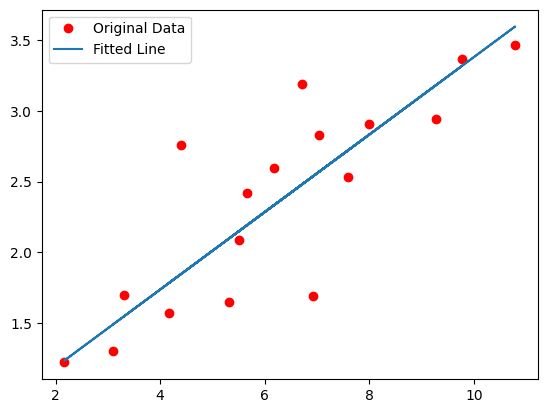

In [18]:
import matplotlib.pyplot as plt
plt.plot(X,Y,'ro',label='Original Data')
plt.plot(X,np.array(w*X+b),label='Fitted Line')
plt.legend()
plt.show()